<a href="https://colab.research.google.com/github/hwnjoroge/Projects/blob/main/Introduction_to_Regression_Project_Hellen_Njoroge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

Task: Develop a model with a threshold for accuracy at 0.75. Check the accuracy using the test dataset.

# Downloading the Data





Importing required libraries

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
#loading the dataset
users_df = pd.read_csv('https://bit.ly/UsersBehaviourTelco')

In [ ]:
#viewing the dataset
users_df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB



The dataset contains 3214 rows and 5 columns. Each row of the dataset contains information about one customer. 

None of the columns contain missing values.
all columns have floeat/integer values.


## Training, Validation and Test Sets

Splitting the Dataset 

We split our dataset into training, validation and test sets. 60% of the data for the training set, 20% for the validation set and 20% for the test set. 

We also specifying the random_state to endure reproducibility in the notebook.

In [ ]:
train_val_df, test_df = train_test_split(users_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)
print('hr_df.shape :', users_df.shape)
print('train_val_df.shape :', train_val_df.shape)

train_df.shape : (1928, 5)
val_df.shape : (643, 5)
test_df.shape : (643, 5)
hr_df.shape : (3214, 5)
train_val_df.shape : (2571, 5)


In [ ]:
train_df

,calls,minutes,messages,mb_used,is_ultra
3187,35.0,259.10,4.0,14857.57,0
1889,84.0,574.03,0.0,16028.42,0
1253,62.0,446.89,7.0,21571.89,0
1147,75.0,511.02,49.0,17120.31,0
2801,34.0,279.06,83.0,13463.84,0
...,...,...,...,...,...
2623,59.0,378.25,14.0,12135.58,0
1143,63.0,412.89,23.0,13945.79,0
2202,101.0,724.65,64.0,13229.44,0
1846,25.0,141.99,84.0,16150.12,1


## Identifying Input and Target Columns

In this dataset, the target column 'is ultra' was identified and omitted from the training data and the input columns 

In [ ]:
input_cols = list(train_df.columns)[:-1]
target_col = 'is_ultra'

In [ ]:
input_cols

['calls', 'minutes', 'messages', 'mb_used']

In [ ]:
target_col

'is_ultra'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()


In [ ]:
#view the training dataset
train_inputs.head(3)


,calls,minutes,messages,mb_used
3187,35.0,259.10,4.0,14857.57
1889,84.0,574.03,0.0,16028.42
1253,62.0,446.89,7.0,21571.89


In [ ]:
#view the training target
train_targets.head(3)

3187    0
1889    0
1253    0
Name: is_ultra, dtype: int64

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
val_inputs.head(3)


,calls,minutes,messages,mb_used
2644,48.0,436.16,13.0,29072.01
1931,131.0,976.35,104.0,27163.13
2767,27.0,148.89,45.0,6976.25


In [ ]:
val_targets.head(3)

2644    0
1931    1
2767    1
Name: is_ultra, dtype: int64

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
test_inputs.head(3)


,calls,minutes,messages,mb_used
506,46.0,338.60,35.0,11428.54
2513,39.0,242.71,0.0,20480.11
354,39.0,258.02,0.0,19998.80


In [ ]:
test_targets.head(3)

506     0
2513    0
354     0
Name: is_ultra, dtype: int64

## Scaling Numeric Features

Scaling numeric features to ensure that no particular feature has a disproportionate impact on the model. 
The numeric columns in our dataset have varying ranges and will scaled to a small range of values between $(0,1)$ 


In [ ]:
#selecting just the number columns from train set and assigning them to the variable numeric cols
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['calls', 'minutes', 'messages', 'mb_used']


Scaling using the `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [ ]:
#fit the scaler to the numeric columns 
scaler = MinMaxScaler().fit(users_df[numeric_cols])

In [ ]:
#scaling the train,validation and test datasets using the .tranform method
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
#verifying the scaled values in teh validation set
val_inputs.describe().loc[['min', 'max']]

,calls,minutes,messages,mb_used
min,0.000000,0.000000,0.000000,0.000000
max,0.831967,0.959799,0.852679,0.883119


In [ ]:
#verifying the scaled values in the train set
train_inputs.describe().loc[['min', 'max']]

,calls,minutes,messages,mb_used
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


In [ ]:
#verifying the scaled values in the test set
test_inputs.describe().loc[['min', 'max']]

,calls,minutes,messages,mb_used
min,0.000000,0.000000,0.000000,0.000000
max,0.811475,0.851819,0.763393,0.908234


#Decision Tree Model 

Training the Decision Tree Model to predict the 'is_ultra' values.

To train a Decision Tree model, we use the `DecisionTreeClassifier` class from Scikit-learn.

In [ ]:
model = DecisionTreeClassifier(random_state=42)

Training the model using `model.fit`.

In [ ]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

An optimal decision tree has now been created using the training data.

### Evaluating the Decision Tree

Evaluating the decision tree using the accuracy score.

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_preds

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
pd.value_counts(train_preds)

0    1323
1     605
dtype: int64

Checking the accuracy of its predictions.

In [ ]:
accuracy_score(train_targets, train_preds)

1.0

The training set accuracy is 100%

Evaluating the model on the validation set.

In [ ]:
model.score(val_inputs, val_targets)

0.7309486780715396

Although the training accuracy is 100%, the accuracy on the validation set is  73%

In [ ]:
val_targets.value_counts() / len(val_targets)

0    0.7014
1    0.2986
Name: is_ultra, dtype: float64

In [ ]:
model.score(test_inputs, test_targets)

0.7356143079315708

The model has learned from the training examples perfectly, but it doesn't generalize well to unseen data. Its overfitted.
the accuracy on the test set is  73.5%

## Decision Tree Hyperparameter Tuning 

In [ ]:
# checking the Decision tree models depth in the above before hyperparameter tuning
model.tree_.max_depth

27

### `max_depth`

Reducing the maximum depth of the decision tree to prevent the tree from memorizing all training examples, which  may in turn lead to better generalization in the validation dataset. Setting the hyperparameter max_depth to 3

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Computing the accuracy of the model on the training and validation and test sets using `model.score`

In [ ]:
model.score(train_inputs, train_targets)

0.7982365145228216

In [ ]:
model.score(val_inputs, val_targets)

0.7744945567651633

In [ ]:
model.score(test_inputs, test_targets)

0.7776049766718507

After reducing the max-depth from 27 to 3, the training accuracy of the model has reduced from 100% to 79.8% , while the validation accuracy of the model has increased from 73% to 77%.

the accuracy on the test set also incresed from 74.4% to 77.7%

Trying out different depths using a helper function to see which value of max_depth has the least Validation Error

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_inputs, train_targets)
    train_accuracy = 1 - model.score(train_inputs, train_targets)
    val_accuracy = 1 - model.score(val_inputs, val_targets)
    test_accuracy = 1- model.score(test_inputs, test_targets)
    return {'Max Depth': md, 'Training Error': train_accuracy, 'Validation Error': val_accuracy , 'Test Prediction Error': test_accuracy}
    

In [ ]:
#the range of max depth is set to 27 which is the initial decision tree max_depth. 
#we are looking to see which value of the max_depth within that range will improve the validation and test prediction error the most.
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 28)])

In [ ]:
errors_df

,Max Depth,Training Error,Validation Error,Test Prediction Error
0,1,0.252593,0.258165,0.230171
1,2,0.218880,0.225505,0.209953
2,3,0.201763,0.225505,0.222395
3,4,0.195021,0.219285,0.209953
4,5,0.170643,0.228616,0.195956
5,6,0.161307,0.220840,0.206843
6,7,0.146784,0.211509,0.199067
7,8,0.132261,0.228616,0.222395
8,9,0.116183,0.214619,0.208398
9,10,0.106846,0.234837,0.206843


At max_depth =5, the  Validation Error and the Test Prediction Error are the least.


Setting the hyperparameter max_depth to 5 and computing the accuracy of the model on the training and validation and test sets using model.score


In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model.score(train_inputs, train_targets)

0.8293568464730291

In [ ]:
model.score(val_inputs, val_targets)

0.7713841368584758

In [ ]:
model.score(test_inputs, test_targets)

0.8040435458786936

After reducing the max-depth from 27 to 5, the training accuracy of the model has reduced from 100% to 82.9% ,  the validation accuracy of the model has increased from 73% to 77% while the test prediction accuracy increased from 74.4% to 80%

### `min_samples_split`

this prohibits creating nodes that don't contain enough observations from the training set.


Trying out different minimum sample splits using a helper function to see which value of min_samples_split has the least Validation and Test Prediction Error

In [ ]:
def min_sample_split_error(md):
    model = DecisionTreeClassifier(min_samples_split=md, random_state=42)
    model.fit(train_inputs, train_targets)
    train_acc = 1 - model.score(train_inputs, train_targets)
    val_acc = 1 - model.score(val_inputs, val_targets)
    test_acc = 1 - model.score(test_inputs, test_targets)
    return {'Minimum Sample Split': md, 'Training Error': train_acc, 'Validation Error': val_acc, 'Test Prediction Error': test_acc}

In [ ]:
samplesplit_errors_df = pd.DataFrame([min_sample_split_error(md) for md in range(2, 50)])

In [ ]:
samplesplit_errors_df

,Minimum Sample Split,Training Error,Validation Error,Test Prediction Error
0,2,0.000000,0.269051,0.264386
1,3,0.014004,0.265941,0.265941
2,4,0.030602,0.245723,0.237947
3,5,0.037344,0.250389,0.248834
4,6,0.051867,0.265941,0.256610
5,7,0.061722,0.269051,0.258165
6,8,0.067427,0.269051,0.255054
7,9,0.078320,0.258165,0.234837
8,10,0.080913,0.258165,0.241058
9,11,0.087137,0.262830,0.241058


At min_samples_split = 38, the  Validation and Test Prediction Errors are the least.
Setting the hyperparameter min_samples_split to 38, computing the accuracy of the model on the training and validation and test sets using model.score


In [ ]:
model = DecisionTreeClassifier(min_samples_split=38, random_state=42)
model.fit(train_inputs, train_targets)
model.score(train_inputs, train_targets)

0.8516597510373444

In [ ]:
model.score(val_inputs, val_targets)

0.7822706065318819

In [ ]:
model.score(test_inputs, test_targets)

0.7962674961119751

After setting the min_sample_split to 38, the training accuracy of the model has reduced from 100% to 85.16% , the validation accuracy of the model has increased from 73% to 78.2%, and the test accuracy increased from 74.4% to 79.6%

### `min_samples_leaf`

This hyperparameter prevents the algorithm from adding leaf nodes that don't have enough observations from the training set.


Trying out different min_samples-leaf using a helper function to see which value of min_samples_leaf has the least Validation and Test prediction Error 

In [ ]:
def min_sample_leaf_error(md):
    model = DecisionTreeClassifier(min_samples_leaf=md, random_state=42)
    model.fit(train_inputs, train_targets)
    train_accuracy = 1 - model.score(train_inputs, train_targets)
    val_accuracy= 1 - model.score(val_inputs, val_targets)
    test_accuracy = 1 - model.score(test_inputs, test_targets)
    return {'Minimum Sample Leaf': md, 'Training Error': train_accuracy, 'Validation Error': val_accuracy ,  'Test Prediction Error': test_accuracy}

In [ ]:
samplesleaf_errors_df = pd.DataFrame([min_sample_split_error(md) for md in range(2, 50)])

In [ ]:
samplesleaf_errors_df

,Minimum Sample Split,Training Error,Validation Error,Test Prediction Error
0,2,0.000000,0.269051,0.264386
1,3,0.014004,0.265941,0.265941
2,4,0.030602,0.245723,0.237947
3,5,0.037344,0.250389,0.248834
4,6,0.051867,0.265941,0.256610
5,7,0.061722,0.269051,0.258165
6,8,0.067427,0.269051,0.255054
7,9,0.078320,0.258165,0.234837
8,10,0.080913,0.258165,0.241058
9,11,0.087137,0.262830,0.241058


At min_samples_leaf = 38, the  Validation and Test Error is the least.

Setting the hyperparameter min_samples_leaf to 38, and computing the accuracy of the model on the training ,validation and test sets using model.score


In [ ]:
model = DecisionTreeClassifier(min_samples_leaf=38, random_state=42)

In [ ]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=38, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model.score(train_inputs, train_targets)

0.8117219917012448

In [ ]:
model.score(val_inputs, val_targets)

0.7542768273716952

In [ ]:
model.score(test_inputs, test_targets)

0.7589424572317263

After setting the min_sample_leaf to 38, the training accuracy of the model has reduced from 100% to 81.17% ,  the validation accuracy of the model has increased from 73% to 75.42% while the test prediction accuracy increased from 74.4% to 75.8%


### `Combining optimal values for the hyperparameters max_depth and  min_samples_split and retraining the model for accuracy`




In [ ]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=38, random_state=42)

In [ ]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=38,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model.score(train_inputs, train_targets)

0.8267634854771784

In [ ]:
model.score(val_inputs, val_targets)

0.776049766718507

In [ ]:
model.score(test_inputs, test_targets)

0.807153965785381

After setting the `min_sample_split` 38 and the `max_depth` to 5, the training accuracy of the model has reduced from 100% to 82.6% , the validation accuracy of the model has increased from 73% to 77.6% while the test prediction accuracy increased from 74.4% to 80.7%


The combination of `max_depth` =5 and `min_sample_split`=38 results in the highest validation and test prediction accuracy in comparison to the individual hyperparameter tuned validation accuracies.





# Random Forest Model
Training the RandomForest Model  to predict the 'is_ultra' values.

To train a Random Forest model, we use the RandomForestClassifier class from Scikit-learn.

In [71]:
random_model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [72]:
random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Evaluating the Random Forest 

Evaluating the Random Forest using the accuracy score.

In [73]:
random_model.score(train_inputs, train_targets)

1.0

In [74]:
random_model.score(val_inputs, val_targets)

0.7947122861586314

In [75]:
random_model.score(test_inputs, test_targets)

0.8102643856920684

The training set accuracy is 100%,  the accuracy on the validation set is  79.4% while the accuracy on the test set is 81%



## Hyperparameter Tuning with Random Forests


### `n_estimators`

This argument will set the number of decision trees in the random forest. The default used in training the model was 100

Varying the estimators to **300 estimators**

In [76]:
random_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=300)
random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
random_model.score(train_inputs, train_targets)

1.0

In [78]:
random_model.score(val_inputs, val_targets)

0.7993779160186625

In [79]:
random_model.score(test_inputs, test_targets)

0.8102643856920684

After setting the n_estimators=300, the training accuracy of the model has remained 100% ,  the validation accuracy of the model has increased slightly from 79.4% to 79.9% while the accuracy on the test set remained at 81% 

In [80]:
#Varying the estimators to n_estimators=200

random_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)
random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [81]:
random_model.score(train_inputs, train_targets)

1.0

In [82]:
random_model.score(val_inputs, val_targets)

0.7962674961119751

In [83]:
random_model.score(test_inputs, test_targets)

0.8102643856920684

After setting the n_estimators=200, the training accuracy of the model has remained 100% , the validation accuracy of the model has dropped from 79.9% to 79.6% while the accuracy on the test set remained at 81% 


In [85]:
#Varying the estimators to n_estimators=320

random_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=320)
random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=320,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [86]:
random_model.score(train_inputs, train_targets)

1.0

In [87]:
random_model.score(val_inputs, val_targets)

0.7947122861586314

In [88]:
random_model.score(test_inputs, test_targets)

0.8087091757387247

After setting the n_estimators=320, the training accuracy of the model has remained 100% , the validation accuracy of the model has dropped from 79.9% to 
79.4% while the accuracy on the test set dropped from 81% to 80%


Therefore, n_estimators=300 gives the best test prediction accuracy score of 81%

#Logistic Regression Model

Training a logistic Regression Model to predict the 'is_ultra' values

In [91]:
logistic_model = LogisticRegression(solver='liblinear')

In [92]:
logistic_model.fit(train_inputs, train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
train_preds = logistic_model.predict(train_inputs)

Testing the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets` using the `accuracy_score` function from `sklearn.metrics`.

In [95]:
accuracy_score(train_targets, train_preds)

0.7422199170124482

The model achieves an accuracy of 74% on the training set. 



In [98]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.98185941, 0.01814059],
       [0.78181818, 0.21818182]])

In [100]:
# Computing the model's accuracy on the validation and test datasets
val_preds = logistic_model.predict(val_inputs)
accuracy_score(val_targets, val_preds)

0.7465007776049767

In [101]:
test_preds = logistic_model.predict(test_inputs)
accuracy_score(test_targets, test_preds)

0.7589424572317263

The accuracy of the model on the validation set is 74.6%
and on the test sets are 75.8% respectively.

Both are improvements on the training set of  which suggests that our model generalizes well to data it hasn't seen before. 



# Sanity Check

In [102]:
pd.value_counts(test_preds)

0    582
1     61
dtype: int64

In [103]:
pd.value_counts(val_preds)

0    594
1     49
dtype: int64

0    582
1     61
dtype: int64


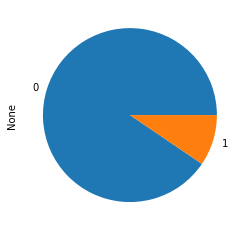

In [111]:
class_frequency = pd.value_counts(test_preds)
print(class_frequency)
class_frequency.plot(kind ='pie')


#Summary of Findings and Recommendations


All models show improvements on the training set of  which suggests that the models generalize well to data not hasn't seen before. 

Random Forest Model:
After tuning the hyperparamter `n_estimators` to 300 the Random Forest achieved the best accuracy score on the users dataset at 81%

Decision Tree Model: 
After tuning the hyperparameters `min_sample_split` 38 and the `max_depth` to 5, decision tree model gives the second best accuracy on the test data at 80.7%

Logistic Regression Model:
The accuracy of the model on the test sets are 75.8% respectively.


In this case i advise Megaline to use the  Random Forest model  while making the decison to recommend the Smart or Ultra plans to their users -